## CS613 Assignment 1 : basic text analysis on Tom Sawyer
### Sohhom Bandyopadhyay (15510011)

Question:
- Download any one of the text dataset mentioned in the previous lecture.
- Compute tokens, types, and TTR.
- Plot Zipf’s law and check if Zipf’s law holds true for meanings and lengths. When and when not?
- Plot Heaps’ law. Fit a curve and report the estimated K and β values.

In [1]:
# tomsawyer_cropped.txt has the entire text without project gutenberg license and readme sections
with open('tomsawyer_cropped.txt', 'r', encoding='utf-8') as fh:
    alltext = fh.read()

In [2]:
import string
# remove punctuations from the text
translator = str.maketrans('', '', string.punctuation)
cleaned_text = alltext.translate(translator)

# replace newlines with spaces, remove double quotes
cleaned_text = cleaned_text.translate({ord('\n'):' ', ord('\"'):''})

# lowercase everything for improved word counts
cleaned_text = cleaned_text.lower()

### Tokens, Types and TTR

In [3]:
# chunk the text into words. a word is defined as a sequence of chars ended with space
words = [w for w in filter(lambda x: len(x)>0, cleaned_text.split(' '))]

# remove duplicates to calculate the unique words
unique_words = set(words)

# sanity check: show the size of types and tokens 
len(unique_words), len(words)

(9155, 70796)

In [4]:
# first question
print ("Type Token ratio of Tom Sawyer after removing punctuation is :", len(unique_words) / len(words))

Type Token ratio of Tom Sawyer after removing punctuation is : 0.12931521554890107


### Zipf's law calculation and output

In [5]:
# find how many times each word appears
# note: word_counts is a dict; keys are words, values are counts
word_counts = {word: 0 for word in unique_words}
for word in words:
    word_counts[word] += 1
    
# sanity check : print the count for some random words
for check_w in ["the", "go", "say", "run", "fear", "hope", "promise"]:
    print (check_w, word_counts[check_w])

the 3735
go 132
say 75
run 21
fear 11
hope 29
promise 7


In [6]:
import operator
# sort the word counts by frequency, in decreasing order
# note: sorted_word_counts is a list of tuples, each element giving a word and corresponding count
sorted_word_counts = sorted(word_counts.items(), key=operator.itemgetter(1))[::-1]

In [7]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [8]:
matplotlib.rcParams['figure.figsize'] = 15,10

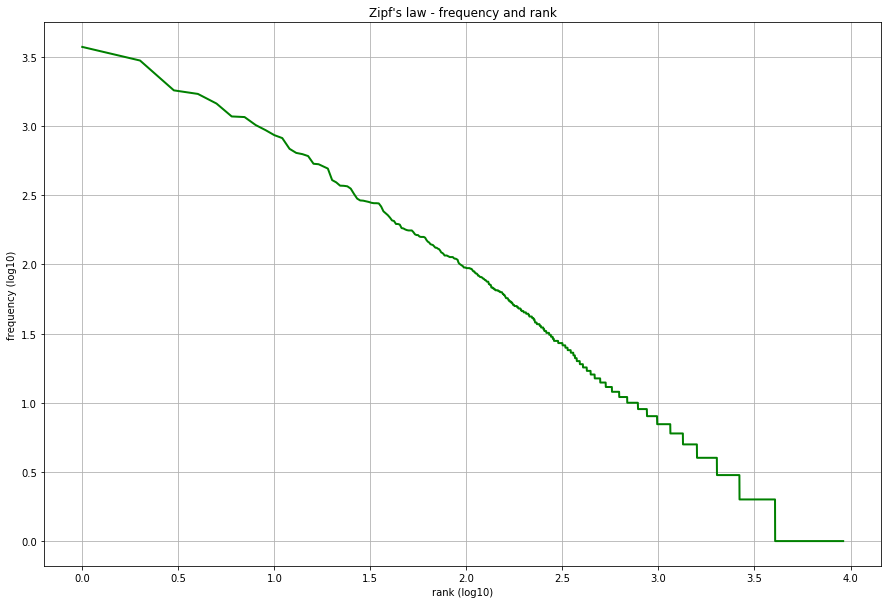

In [9]:
# calculate frequency and rank pairs for plot
x = np.log10(list(range(1, len(sorted_word_counts)+1)))
y = np.log10(list(map(lambda x: x[1], sorted_word_counts)))

# plot zipf's law for frequency and rank
plt.plot(x,y, lw=2, color='green')
plt.xlabel("rank (log10)")
plt.ylabel("frequency (log10)")
plt.title("Zipf's law - frequency and rank")
plt.grid()
plt.show()

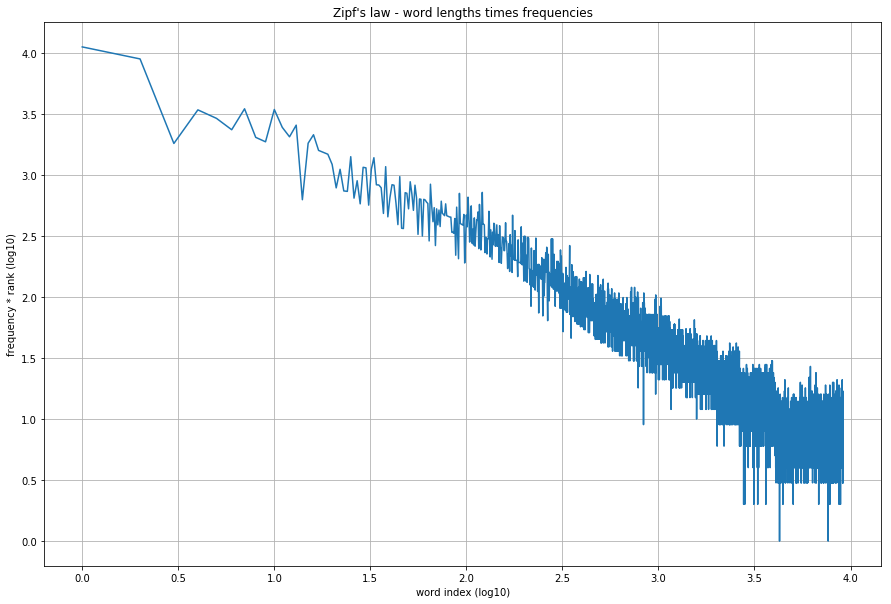

In [10]:
a = np.array([len(x[0]) for x in sorted_word_counts]) # word lengths
b = np.array([x[1] for x in sorted_word_counts]) # word frequencies
const = a * b

# plot Zipf's law for lengths and frequencies
plt.plot(np.log10(list(range(1, len(const)+1))), np.log10(const))
plt.ylabel("frequency * rank (log10)")
plt.xlabel("word index (log10)")
plt.title("Zipf's law - word lengths times frequencies")
plt.grid()
plt.show()

I cound not do Zipf's law for meanings, because the dictionary file is significantly complex. <br>
we would need a dict like {'bank':4, 'computer': 2} etc. indicating the number of meanings for a given word <br>
the gutenberg file that Sir had sent requires a lot of parsing before such a dict object can be constructed

### Heaps' law calculations and plotting

In [11]:
# iterate the text word by word, "manually"
vocabulary = set()
v_size = [] # keeps track of vocabulary size as corpus size grows
for wrd in words:
    vocabulary.add(wrd)
    # for each word, just append the current size of vocabulary
    v_size.append(len(vocabulary))
    
    
# sanity check: sizes of v_size and words must be equal, and size of vocabulary must be way lower
len(v_size), len(words), len(vocabulary)

(70796, 70796, 9155)

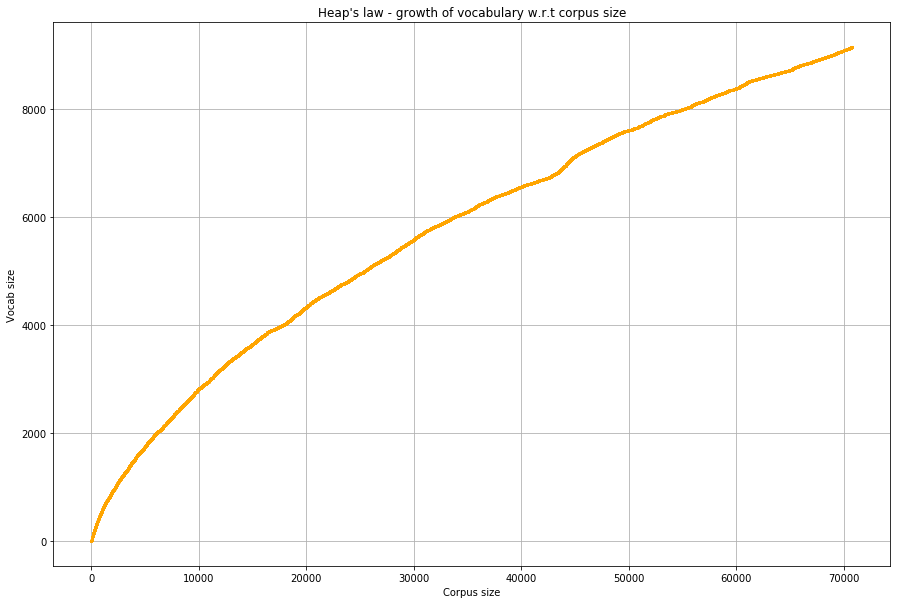

In [12]:
plt.plot(list(range(1,len(words)+1)), v_size, markersize=2, marker='*', color='orange')
plt.title("Heap's law - growth of vocabulary w.r.t corpus size")
plt.xlabel("Corpus size")
plt.ylabel("Vocab size")
plt.grid()

plt.show()

### Heap's law model fitting

The basic equation to be fit is <br>
\begin{equation} |V| = k N^\beta \end{equation} <br>
where $|V|$ denotes size of vocabulary and $N$ is size of corpus, $k$ and $\beta$ are parameters to be estimated. <br> <br>
To do this, first the equation is converted to 
\begin{equation} 
log (|V|) = log (k) + \beta log (N)
\end{equation}
This is essentially a linear equation of the form
\begin{equation} 
y = mx + c
\end{equation} <br>
Which can be fitted using a standard linear regression solver like scikit-learn LinearRegression.

In [13]:
from sklearn.linear_model import LinearRegression
# curve fitting with scikit learn
X = np.log(list(range(1, len(words)+1))).reshape(-1,1)
Y = np.log(v_size)

In [14]:
model = LinearRegression()
model.fit(X,Y)
K = np.exp(model.intercept_)
beta = model.coef_[0]

In [15]:
print ("k = {0:.4f}, beta = {1:.4f}".format(K, beta))

k = 6.5080, beta = 0.6535
